<a href="https://www.kaggle.com/code/amulyat29/pss4e1-binary-classification-bank-churn?scriptVersionId=157638076" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


# Loading Packages

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean, std
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Exploratory Data Analysis (EDA)

## Loading Data

In [3]:
train_data = pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")

## Understanding the structure

In [4]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
train_data.shape, test_data.shape

((165034, 14), (110023, 13))

In [6]:
train_data.columns.to_list()

['id',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [8]:
train_data.nunique()

id                 165034
CustomerId          23221
Surname              2797
CreditScore           457
Geography               3
Gender                  2
Age                    71
Tenure                 11
Balance             30075
NumOfProducts           4
HasCrCard               2
IsActiveMember          2
EstimatedSalary     55298
Exited                  2
dtype: int64

In [9]:
train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [10]:
train_data.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
test_data.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [12]:
train_data.drop_duplicates(inplace = True, keep = 'first')

## Univariate analysis

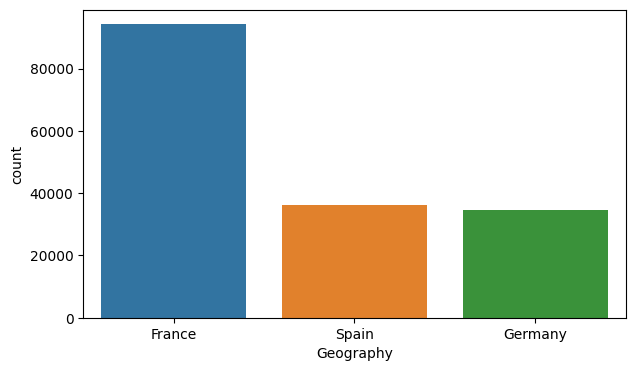

In [13]:
plt.figure(figsize = (7, 4))
sns.countplot(data = train_data, x = 'Geography')
plt.show()

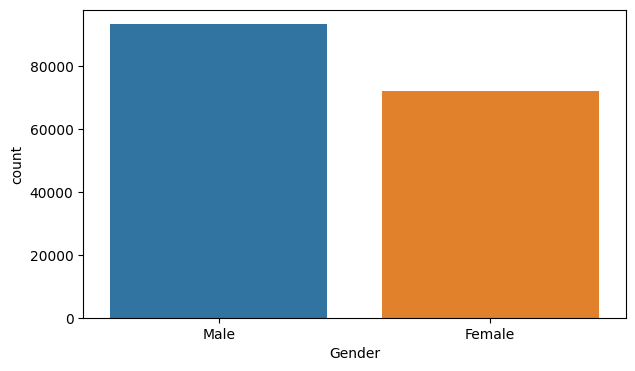

In [14]:
plt.figure(figsize = (7, 4))
sns.countplot(data = train_data, x = 'Gender')
plt.show()

## Bivariate Analysis

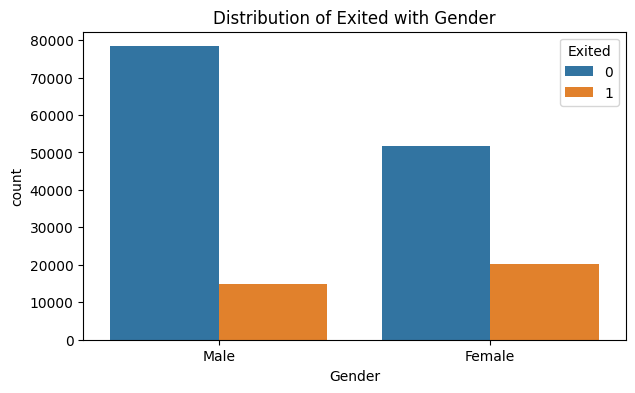

In [15]:
plt.figure(figsize = (7, 4))
sns.countplot(data = train_data, x = 'Gender', hue = 'Exited')
plt.title("Distribution of Exited with Gender")
plt.show()

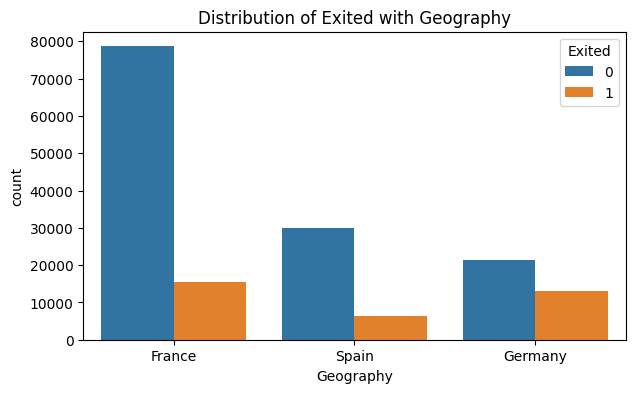

In [16]:
plt.figure(figsize = (7, 4))
sns.countplot(data = train_data, x = 'Geography', hue = 'Exited')
plt.title("Distribution of Exited with Geography")
plt.show()

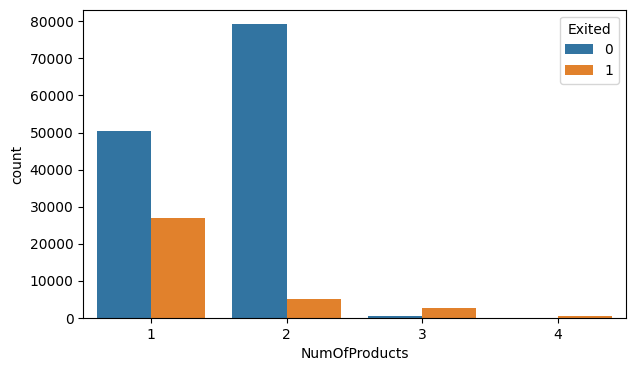

In [17]:
plt.figure(figsize = (7, 4))
sns.countplot(data = train_data, x = 'NumOfProducts', hue = 'Exited')
plt.show()

<Axes: >

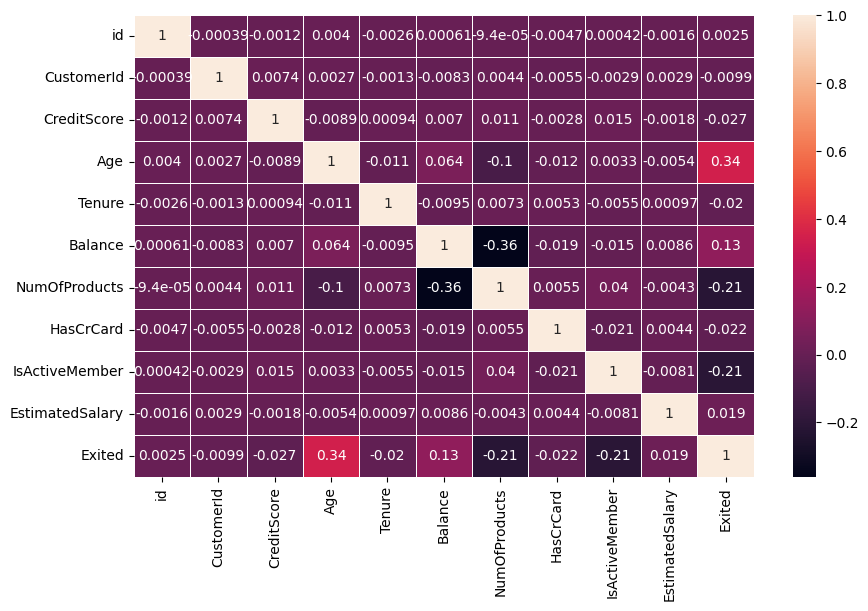

In [18]:
numerical_features = train_data.select_dtypes(exclude = 'object').columns
plt.figure(figsize = (10,6))
sns.heatmap(data = train_data[numerical_features].corr(), annot = True, linewidth = 0.5)

## Encoding categorical features

In [19]:
encoder = LabelEncoder()
categorical_features = train_data.select_dtypes(include = 'object').columns
print("Categorical features: ", categorical_features)
for feature in categorical_features:
    train_data[feature] = encoder.fit_transform(train_data[feature])
    

Categorical features:  Index(['Surname', 'Geography', 'Gender'], dtype='object')


In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  int64  
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  int64  
 5   Gender           165034 non-null  int64  
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 17.6 MB


In [21]:
encoder = LabelEncoder()
for feature in categorical_features:
    test_data[feature] = encoder.fit_transform(test_data[feature])

In [22]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  int64  
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  int64  
 5   Gender           110023 non-null  int64  
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 10.9 MB


## Splitting the data into train and validation sets 

In [23]:
X = train_data.drop(['Exited', 'id','CustomerId'], axis = 1)
y= train_data['Exited']
X.shape, y.shape

((165034, 11), (165034,))

## Normalizing the features

In [24]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size =0.2, random_state = 123)
print("Shape of training data: ", X_train.shape, y_train.shape)
print("Shape of validation data", X_val.shape, y_val.shape)

Shape of training data:  (132027, 11) (132027,)
Shape of validation data (33007, 11) (33007,)


# Modelling Data

# XGBoost

In [26]:
# Create the model
xgb_model = XGBClassifier()

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
preds = xgb_model.predict(X_val)
pred_proba = xgb_model.predict_proba(X_val)

In [27]:
print("Accuracy:", accuracy_score(y_val, preds)) 
print("Precision:", precision_score(y_val, preds, average="weighted")) 
print('Recall:', recall_score(y_val, preds, average="weighted")) 
print('Roc_auc_score:', roc_auc_score(y_val, preds))

Accuracy: 0.8644529948192807
Precision: 0.8570368422926078
Recall: 0.8644529948192807
Roc_auc_score: 0.7552567478385127


## Hyperparameter tuning for XGBoost 

In [28]:
# Define the hyperparameters grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 7, 8, 10],
    'n_estimators': [50, 100, 150, 200]
}

In [29]:
# Instantiate the GridSearchCV Object
# grid_search = GridSearchCV(estimator = xgb_model,param_grid = param_grid, cv = 5, scoring = 'roc_auc' )

In [30]:
# Fit the GridSearchCV object to the data
# grid_search.fit(X_train, y_train)

In [31]:
# Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

In [32]:
# Get the best model
# best_model = grid_search.best_estimator_

In [33]:
# Make predictions on the training set
# y_pred = best_model.predict(X_val)

In [34]:
# Evaluate the model
# accuracy = accuracy_score(y_val, y_pred)
# print("Accuracy:", accuracy)

## GradientBoostingClassifier 

In [35]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [36]:
# Make predictions
y_pred = gb_model.predict(X_val)

In [37]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8643318084042779


## Hyperparameter tuning for GradientBoostingClassifier

In [38]:
# Define the hyperparameters grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 7, 8, 10],
    'n_estimators': [50, 100, 150, 200]
}

In [39]:
# # Instantiate the GridSearchCV Object
# grid_search = GridSearchCV(estimator = gb_model,param_grid = param_grid, cv = 5, scoring = 'roc_auc' )

# # Fit the GridSearchCV object to the data
# grid_search.fit(X_train, y_train)

In [40]:
# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Get the best model
# best_model = grid_search.best_estimator_

# # Make predictions on the training set
# y_pred = best_model.predict(X_val)

# # Evaluate the model
# accuracy = accuracy_score(y_val, y_pred)
# print("Accuracy:", accuracy)

## Random Forest

In [41]:
# define the model
# model = RandomForestClassifier()
# # evaluate the model
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# # report performance
# print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
# sns.distplot(n_scores)

## Stacking 

## Compare base model performance

In [42]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['dt'] = DecisionTreeClassifier()
    models['bayes'] = GaussianNB()
    return models

In [43]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [44]:
# models = get_models()
# results = pd.DataFrame()
# # evaluate the models and store results
# for name, model in models.items():
#     scores = evaluate_model(model, X, y)
#     results[name] = scores
#     print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

## Train a stacked model 

In [45]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    base_models = list()
    base_models.append(('lr', LogisticRegression()))
    base_models.append(('knn', KNeighborsClassifier()))
    base_models.append(('decision_tree', DecisionTreeClassifier()))
    base_models.append(('bayes', GaussianNB()))
    # define meta learner model
    meta_model = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=10)
    return model

In [46]:
# stacked_model = get_stacking().fit(X_train,y_train)

## Use the stacked model to make predictions

In [47]:
# accuracy_score(stacked_model.predict(X_val),y_val)

XGBoost performs better than the stacked model. So we take the XGBoost model to predict test_data

## Final model 

In [48]:
xgb_model = XGBClassifier(learning_rate =  0.2, max_depth = 4, n_estimators = 150)
final_model = xgb_model
final_model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Submission

In [49]:
ids = test_data['id']
test_data.drop(['id', 'CustomerId'], axis = 1, inplace = True)

In [50]:
scaler = StandardScaler()
test_data = scaler.fit_transform(test_data)

In [51]:
test_predictions = final_model.predict_proba(test_data)[:,1]

In [52]:
test_predictions

array([0.03924727, 0.8120411 , 0.02393224, ..., 0.01864175, 0.13036896,
       0.16993448], dtype=float32)

In [53]:
submission = pd.DataFrame()
submission['id'] = ids
submission['Exited'] = test_predictions

In [54]:
submission.head()

,id,Exited
0,165034,0.039247
1,165035,0.812041
2,165036,0.023932
3,165037,0.265000
4,165038,0.325269


In [55]:
submission.to_csv('submission.csv', index = False)

In [56]:
submission_df = pd.read_csv("submission.csv")
submission_df.head()

,id,Exited
0,165034,0.039247
1,165035,0.812041
2,165036,0.023932
3,165037,0.265000
4,165038,0.325269
